<a href="https://colab.research.google.com/github/ansh90378/Anomaly_Detection90378/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Draft Section

In [2]:
print("Hello Ansh")

Hello Ansh


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.ensemble import IsolationForest

In [6]:
df = pd.read_excel("/content/data_AD.xlsx")

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [7]:
df.head(20)

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39
5,2017-01-01 00:25:00,878.54,932.38,-188.37,-177.98,870.31,-146.92
6,2017-01-01 00:30:00,905.94,951.32,-184.2,-182.67,889.39,-151.83
7,2017-01-01 00:35:00,877.83,939.63,-184.2,-181.17,875.75,-149.7
8,2017-01-01 00:40:00,871.01,938.73,-184.2,-181.17,871.35,-145.62
9,2017-01-01 00:45:00,905.46,939.06,-182.63,-178.23,871.35,-148.88


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [9]:
df.describe()

,time
count,377719
mean,2018-10-20 02:10:21.647840
min,2017-01-01 00:00:00
25%,2017-11-24 21:07:30
50%,2018-10-19 18:10:00
75%,2019-09-13 15:12:30
max,2020-08-07 12:15:00


In [10]:
df.isnull().sum()

,0
time,0
Cyclone_Inlet_Gas_Temp,0
Cyclone_Material_Temp,0
Cyclone_Outlet_Gas_draft,0
Cyclone_cone_draft,0
Cyclone_Gas_Outlet_Temp,0
Cyclone_Inlet_Draft,0


In [11]:
for column in df.columns:
  if df[column].dtype == object:
    try:
      df[column] = pd.to_numeric(df[column], errors='coerce')
    except ValueError:
      print(f"Could not convert {column} to numeric.")



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


In [13]:
df.fillna(method='ffill', inplace=True)

<ipython-input-13-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [14]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [15]:
df['Temp_difference'] = df['Cyclone_Inlet_Gas_Temp'] - df['Cyclone_Gas_Outlet_Temp']
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Temp_difference
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,15.50
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,16.70
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,9.61
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,9.43
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,15.60


In [16]:
# prompt: generate a list of all features delete time and Temp_difference

features = list(df.columns)
features.remove('time')
features.remove('Temp_difference')
print(features)


['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp', 'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [18]:
'NaN' in X_scaled

False

In [19]:
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(X_scaled)

In [20]:
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

In [21]:
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Temp_difference,anomaly
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,15.50,0
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,16.70,0
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,9.61,0
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,9.43,0
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,15.60,0


In [22]:
df['timestamp'] = pd.date_range(start='1/1/2021', periods=len(df), freq='5T')

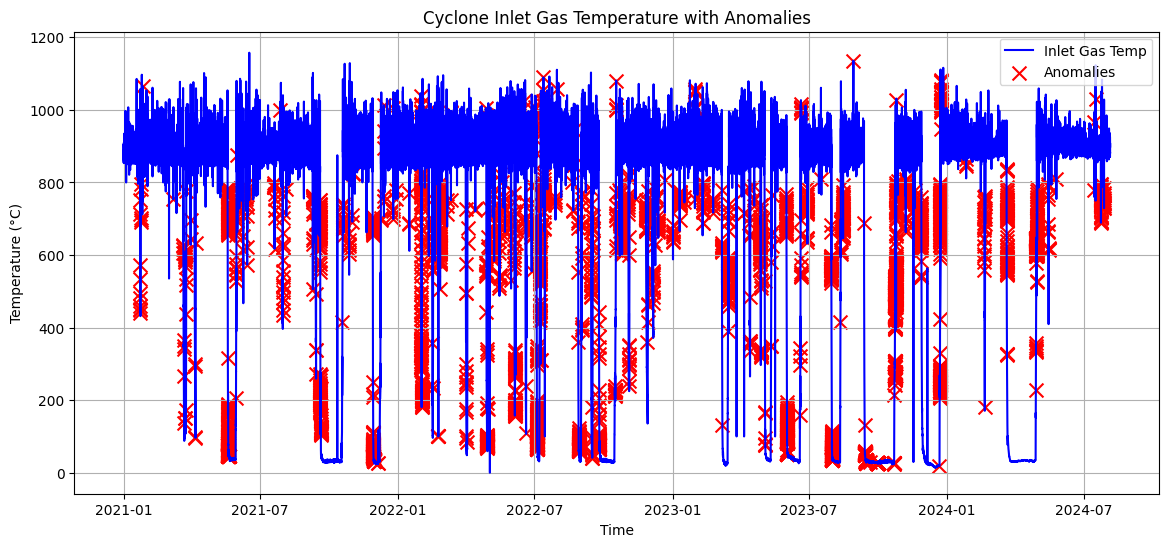

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['Cyclone_Inlet_Gas_Temp'], label='Inlet Gas Temp', color='blue')
plt.scatter(df[df['anomaly'] == 1]['timestamp'], df[df['anomaly'] == 1]['Cyclone_Inlet_Gas_Temp'], color='red', label='Anomalies', marker='x', s=100)
plt.title('Cyclone Inlet Gas Temperature with Anomalies')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

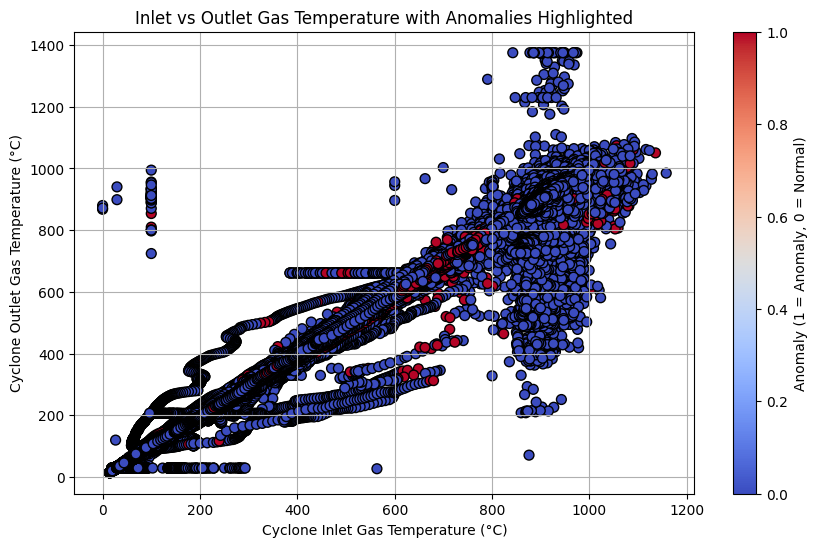

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cyclone_Inlet_Gas_Temp'], df['Cyclone_Gas_Outlet_Temp'], c=df['anomaly'],
            cmap='coolwarm', edgecolor='k', s=50)
plt.title('Inlet vs Outlet Gas Temperature with Anomalies Highlighted')
plt.xlabel('Cyclone Inlet Gas Temperature (°C)')
plt.ylabel('Cyclone Outlet Gas Temperature (°C)')
plt.colorbar(label='Anomaly (1 = Anomaly, 0 = Normal)')
plt.grid(True)
plt.show()

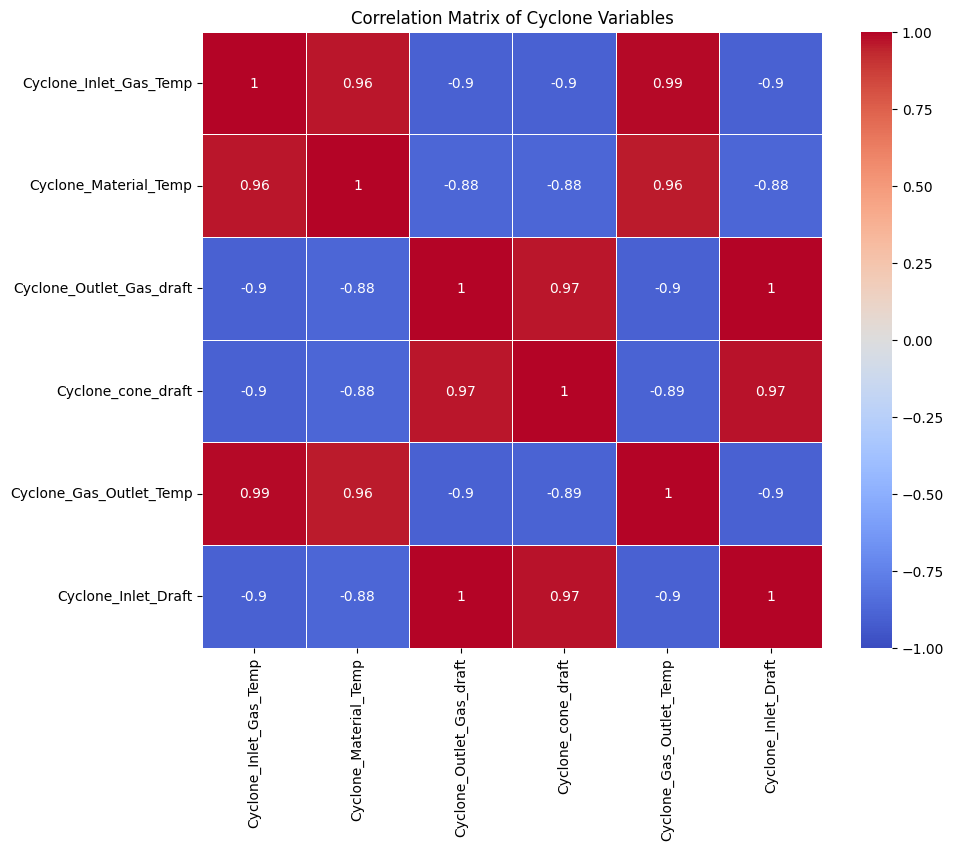

In [26]:
corr_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Cyclone Variables')
plt.show()

In [27]:
df.to_excel('cyclone_anomaly_visualization_results.xlsx', index=False)